In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
test_all_file = '/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/data/prediction_compare_step36/test_step36_pre72_smoothed1.csv'

In [3]:
2303-360

1943

In [4]:
1943/36

53.97222222222222

In [5]:
df = pd.read_csv(test_all_file,header=None)

In [6]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,22.389671,21.324726,20.437271,19.531059,18.609216,17.674347,16.895289,16.079407,15.232840,14.527366,...,20.356927,21.964106,23.970088,26.141740,28.284783,30.903986,34.086655,37.072213,39.726844,41.772370
1,6.345636,6.288030,6.240025,6.366687,6.638906,6.865755,7.221463,7.684552,8.070460,8.392050,...,117.909641,117.758034,117.631695,117.693079,117.077566,116.731305,116.609421,116.507851,116.089876,114.741563
2,43.699373,46.249477,49.541231,53.117693,57.598077,61.831731,66.693109,71.244258,75.870215,79.891846,...,109.904278,110.420232,110.850193,111.208494,111.840412,112.533677,113.278064,113.731720,114.109767,114.091472
3,112.398314,111.165262,110.471052,110.059210,109.716008,109.596673,109.830561,110.192134,110.826779,111.522315,...,121.933995,122.944996,123.787497,124.656247,125.546873,126.122394,127.101995,128.084996,128.570830,128.809025
4,121.698335,122.081946,122.568288,123.306907,123.755756,123.963130,124.135941,124.446618,125.205515,125.671262,...,149.331362,150.109469,150.091224,149.576020,148.646683,147.705569,146.421308,144.517756,142.431464,139.692886
5,135.690146,136.241788,137.201490,138.001242,139.334368,140.445307,141.371089,143.475907,145.896590,147.747158,...,72.470947,71.225789,69.854824,68.379020,66.982517,65.485431,64.071192,62.725993,61.438328,60.198607
6,138.866658,136.222215,133.518513,131.265427,128.721189,125.934324,122.778604,119.982170,117.151808,114.126507,...,28.278756,27.398963,26.665803,25.554836,24.629030,23.690858,22.742382,21.785318,20.821098,19.850915
7,58.174392,56.978660,55.982217,55.151847,54.293206,53.244338,52.036949,50.864124,49.553437,48.127864,...,7.042256,6.868547,6.723789,6.603158,6.502631,6.418859,6.349049,6.290875,6.242395,6.201996
8,18.522754,17.768962,17.140801,16.450668,15.708890,15.090741,14.408951,13.840793,13.367327,12.806106,...,20.455663,22.046386,23.871988,25.893324,28.244436,31.037030,34.197525,37.664604,40.720504,43.100420
9,6.249805,6.208171,6.173476,6.144563,6.287136,6.405947,6.671622,7.059685,7.383071,7.819226,...,121.376941,121.314117,120.928431,121.107026,120.755855,120.796546,121.497122,121.414268,121.178557,120.148797


In [7]:
data_all = df.values
data_all.shape

(10000, 360)

In [8]:
two_week = data_all[0]
len(two_week)

360

In [9]:
for row in range(1, 119):
    two_week = np.append(two_week, data_all[row][-36:])
len(two_week)

4608

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

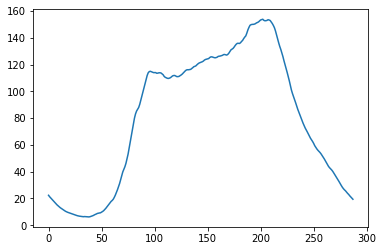

In [11]:
plt.plot(two_week[:288])

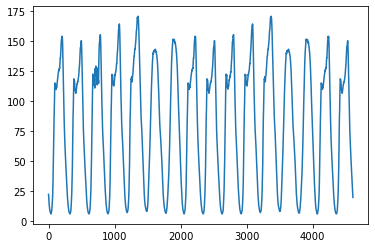

In [12]:
plt.plot(two_week)

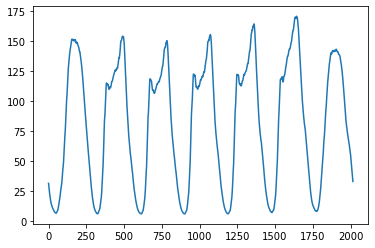

In [13]:
one_week = two_week[288*6:288*13]
plt.plot(one_week)

2304


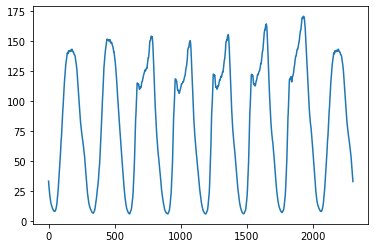

In [14]:
oneweek_plusaday = two_week[288*5:288*13] # 8天 288*8=2304
print(len(oneweek_plusaday))
plt.plot(oneweek_plusaday)

2880


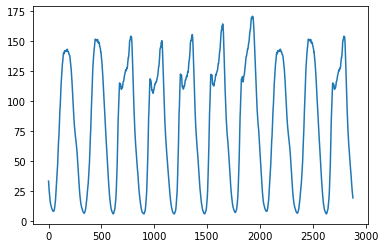

In [19]:
oneweek_plus3day = two_week[288*5:288*15] # 8天 288*8=2304
print(len(oneweek_plus3day))
plt.plot(oneweek_plus3day)

----
#### predict plot

In [87]:
word_len = 2
prediction_len = 1
folder = '/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/prediction_plot/'
week_len = 288*7
file = folder + f'{word_len}_{prediction_len}_plot.csv'
df = pd.read_csv(file)
df

,Unnamed: 0,Input,Predict
0,0,17.126684,4.481884
1,1,17.772238,4.617570
2,2,18.643532,7.977384
3,3,19.536276,8.733210
4,4,20.446896,10.945611
...,...,...,...
2443,2443,150.578920,131.661680
2444,2444,149.149100,130.573970
2445,2445,147.457580,129.605530
2446,2446,145.047990,128.549770


In [88]:
input = df['Input']
predict = df['Predict']

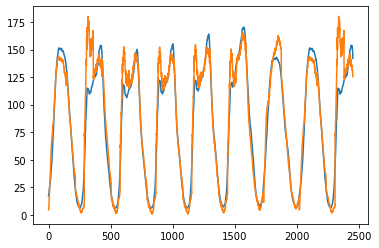

In [89]:
plt.plot(input)
plt.plot(predict)

In [187]:
word_len = 24
prediction_len = 1
folder = '/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/prediction_plot/'
save_path = folder + f'predict_aweek_excel/{word_len}_{prediction_len}.xlsx'

week_len = 288*7
file = folder + f'{word_len}_{prediction_len}_plot.csv'
print(f'file name: {file}')
df = pd.read_csv(file)
df1 = df.iloc[71:]
df1_1 = df1.iloc[:2016]

df1_1.to_excel(save_path, index=False, columns=['Input', 'Predict'])

file name: /Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/prediction_plot/24_1_plot.csv


In [188]:
word_len = 24
prediction_len = 6
folder = '/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/prediction_plot/'
save_path = folder + f'predict_aweek_excel/{word_len}_{prediction_len}.xlsx'

week_len = 288*7
file = folder + f'{word_len}_{prediction_len}_plot.csv'
print(f'file name: {file}')
df = pd.read_csv(file)
df6 = df.iloc[66:]
df6_1 = df6.iloc[:2016]
df6_1.to_excel(save_path, index=False, columns=['Input', 'Predict'])

file name: /Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/prediction_plot/24_6_plot.csv


In [189]:
word_len = 24
prediction_len = 12
folder = '/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/prediction_plot/'
save_path = folder + f'predict_aweek_excel/{word_len}_{prediction_len}.xlsx'

week_len = 288*7
file = folder + f'{word_len}_{prediction_len}_plot.csv'
print(f'file name: {file}')
df = pd.read_csv(file)
df12 = df.iloc[60:]
df12_1 = df6.iloc[:2016]
df12_1.to_excel(save_path, index=False, columns=['Input', 'Predict'])

file name: /Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/prediction_plot/24_12_plot.csv


In [190]:
word_len = 24
prediction_len = 36
folder = '/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/prediction_plot/'
save_path = folder + f'predict_aweek_excel/{word_len}_{prediction_len}.xlsx'
week_len = 288*7
file = folder + f'{word_len}_{prediction_len}_plot.csv'
print(f'file name: {file}')
df = pd.read_csv(file)
df36 = df.iloc[36:]
df36_1 = df6.iloc[:2016]

df36_1.to_excel(save_path, index=False, columns=['Input', 'Predict'])

file name: /Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/prediction_plot/24_36_plot.csv


In [191]:
word_len = 24
prediction_len = 72
folder = '/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/prediction_plot/'
save_path = folder + f'predict_aweek_excel/{word_len}_{prediction_len}.xlsx'
week_len = 288*7
file = folder + f'{word_len}_{prediction_len}_plot.csv'
print(f'file name: {file}')
df = pd.read_csv(file)
df_1 = df.iloc[:2016]
df_1.to_excel(save_path, index=False, columns=['Input', 'Predict'])

file name: /Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/prediction_plot/24_72_plot.csv


In [107]:
288*8

2304

In [192]:
import openpyxl

In [206]:
for word_len in [1,2,6,12,24,'lstm']:
    for prediction_len in [1,6,12,36,72]:
        folder = '/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/prediction_plot/predict_aweek_excel/'
        file = folder + f'{word_len}_{prediction_len}.xlsx'
        save_path = folder + f'predict_2016/{word_len}_{prediction_len}.xlsx'

        wb = openpyxl.load_workbook(file)
        ws = wb.active
        for row in range(2, 290):
            ws.cell(row=row, column=3, value=ws.cell(row=row+1152, column=1).value)
            ws.cell(row=row, column=4, value=ws.cell(row=row+1152, column=2).value)

        wb.save(save_path)